In [1]:
# nltk.download('punkt')
# nltk.download('snowball_data')
# pip install langdetect
# pip install transformers
# pip install torch
# pip install scipy
import pandas as pd

dataset_dir_path = "~/Desktop/Ticket-Datensatz (Stand 09.04.2024)"

contents24= pd.read_csv(f"{dataset_dir_path}/2024/contents.csv")
tickets24 = pd.read_csv(f"{dataset_dir_path}/2024/tickets.csv")

contents23 = pd.read_csv(f"{dataset_dir_path}/2023/contents.csv")
tickets23 = pd.read_csv(f"{dataset_dir_path}/2023/tickets.csv")

contents22 = pd.read_csv(f"{dataset_dir_path}/2022/contents.csv",  on_bad_lines = 'skip')
tickets22 = pd.read_csv(f"{dataset_dir_path}/2022/tickets.csv")

# Labels for these datasets older than 2022 in external csv file
# Fixing all the different labels and column names

labelsPre21 = pd.read_csv(f"{dataset_dir_path}/ticket_labels_JSc.csv")
labelsPre21['ID'] = pd.to_numeric(labelsPre21['ID'], errors = 'coerce')

labelsPre21['support_level'] = labelsPre21['support_level'].replace('2nd Level', '2. Level')
labelsPre21['support_level'] = labelsPre21['support_level'].replace('1st Level', '1. Level')

labelsPre21['department'] = labelsPre21['department'].replace('Application', 'Applikation ') # LSW: DOES THIS SPACE BELONG HERE ?!
labelsPre21['department'] = labelsPre21['department'].replace('Contract', 'Vertrag')

labelsPre21['product'] = labelsPre21['product'].replace('Entwicklungssystem/Mandant', 'Entwicklungssystem bzw. Mandant ')
labelsPre21['product'] = labelsPre21['product'].replace('Business by Design', 'Business By Design ')


# Loading further Datasets pre 2022

contents21 = pd.read_csv(f"{dataset_dir_path}/2021/contents.csv")
tickets21 = pd.read_csv(f"{dataset_dir_path}/2021/tickets.csv")

contents20 = pd.read_csv(f"{dataset_dir_path}/2020/contents.csv")
tickets20 = pd.read_csv(f"{dataset_dir_path}/2020/tickets.csv")

contents19 = pd.read_csv(f"{dataset_dir_path}/2019/contents.csv")
tickets19 = pd.read_csv(f"{dataset_dir_path}/2019/tickets.csv")

contents18 = pd.read_csv(f"{dataset_dir_path}/2018/contents.csv")
tickets18 = pd.read_csv(f"{dataset_dir_path}/2018/tickets.csv")

contents17 = pd.read_csv(f"{dataset_dir_path}/2017/contents.csv")
tickets17 = pd.read_csv(f"{dataset_dir_path}/2017/tickets.csv")

contents16 = pd.read_csv(f"{dataset_dir_path}/2016/contents.csv")
tickets16 = pd.read_csv(f"{dataset_dir_path}/2016/tickets.csv")

contents15 = pd.read_csv(f"{dataset_dir_path}/2015/contents.csv")
tickets15 = pd.read_csv(f"{dataset_dir_path}/2015/tickets.csv")

merged_df = pd.merge(tickets21, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets21['Ticket Label'] = merged_df['support_level']
tickets21['Abteilung Label'] = merged_df['department']
tickets21['Produkt Label'] = merged_df['product']


merged_df = pd.merge(tickets20, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets20['Ticket Label'] = merged_df['support_level']
tickets20['Abteilung Label'] = merged_df['department']
tickets20['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets19, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets19['Ticket Label'] = merged_df['support_level']
tickets19['Abteilung Label'] = merged_df['department']
tickets19['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets18, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets18['Ticket Label'] = merged_df['support_level']
tickets18['Abteilung Label'] = merged_df['department']
tickets18['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets17, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets17['Ticket Label'] = merged_df['support_level']
tickets17['Abteilung Label'] = merged_df['department']
tickets17['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets16, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets16['Ticket Label'] = merged_df['support_level']
tickets16['Abteilung Label'] = merged_df['department']
tickets16['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets15, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets15['Ticket Label'] = merged_df['support_level']
tickets15['Abteilung Label'] = merged_df['department']
tickets15['Produkt Label'] = merged_df['product']


# Combining all Datatsets after converting pre 22 into 22/23 format
contentsComb = pd.concat([contents24, contents23, contents22, contents21, contents20, contents19, contents18, contents17, contents16, contents15], ignore_index = True)
ticketsComb = pd.concat([tickets24, tickets23, tickets22, tickets21, tickets20, tickets19, tickets18, tickets17, tickets16, tickets15], ignore_index = True)

ticketsComb = ticketsComb[ticketsComb['Ticket Label'] != 'Not relevant']

ticketsComb['Ticket Label'] = ticketsComb['Ticket Label'].str.strip()
ticketsComb['Abteilung Label'] = ticketsComb['Abteilung Label'].str.strip()
ticketsComb['Produkt Label'] = ticketsComb['Produkt Label'].str.strip()

ticketsComb.fillna('', inplace = True)

ticketsComb.drop_duplicates('ID')
ticketsComb.count()

ID                    14999
Beschreibung          14999
Kategorie ID          14999
Kategorietext         14999
Unterkategorie ID     14999
Unterkategorietext    14999
Ticket Label          14999
Abteilung Label       14999
Produkt Label         14999
Priorität             14999
Status                14999
Angelegt Am           14999
Angelegt Von          14999
Geändert Am           14999
Geändert Von          14999
Auftraggeber          14999
Meldender             14999
Support Team          14999
Bearbeiter            14999
Erste Nachricht       14999
Letzte Nachricht      14999
dtype: int64

In [2]:
import re
# Combine 'Date' and 'Time' columns into a single 'Timestamp' column
contentsComb['Timestamp'] = pd.to_datetime(contentsComb['Datum'] + ' ' + contentsComb['Uhrzeit'])

# Sort the DataFrame by 'Timestamp' within each group of 'ID' and keep the first entry
onlyfmComb = contentsComb.sort_values(by = 'Timestamp').groupby('ID').first().reset_index()

# Get rid of disturbing line breaks
onlyfmComb['Text'] = onlyfmComb['Text'].replace("\n", " ")

# Regular expression to remove line breaks connected with previous or next words
def remove_melted_line_breaks(text):
    return re.sub(r'\r?\n|\r', ' ', text)

onlyfmComb['Text'] = onlyfmComb['Text'].apply(remove_melted_line_breaks)
# onlyfmComb.iloc[12]['Text']

In [3]:
# Remove rows where both 'Ticket Label' and 'Abteilung Label' are empty
condition = (ticketsComb['Ticket Label'].str.strip() != '') | (ticketsComb['Abteilung Label'].str.strip() != '')
tickets_clean = ticketsComb[condition]

tickets_clean.count()
#onlyfmComb.count()

ID                    8426
Beschreibung          8426
Kategorie ID          8426
Kategorietext         8426
Unterkategorie ID     8426
Unterkategorietext    8426
Ticket Label          8426
Abteilung Label       8426
Produkt Label         8426
Priorität             8426
Status                8426
Angelegt Am           8426
Angelegt Von          8426
Geändert Am           8426
Geändert Von          8426
Auftraggeber          8426
Meldender             8426
Support Team          8426
Bearbeiter            8426
Erste Nachricht       8426
Letzte Nachricht      8426
dtype: int64

In [4]:
# Combine Tickets and Contents into one big data frame
ticketALL = pd.merge(onlyfmComb, tickets_clean, on = 'ID', how = 'right')

# Replace empty values with empty strings
ticketALL['Text'] = ticketALL['Text'].fillna('')
#ticketALL.count()

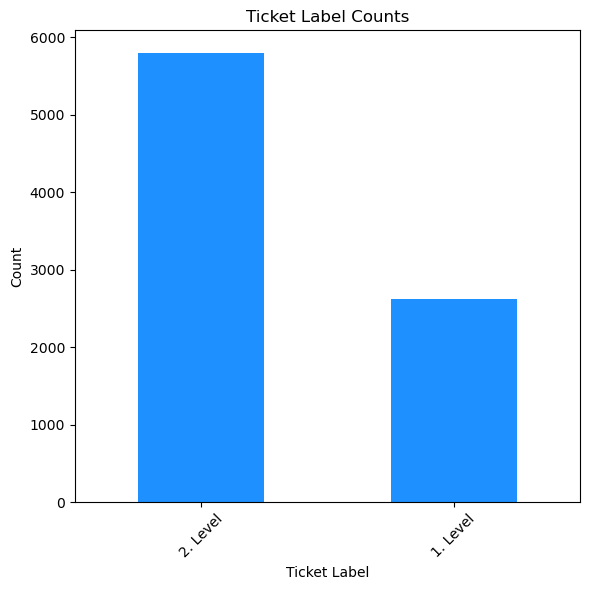

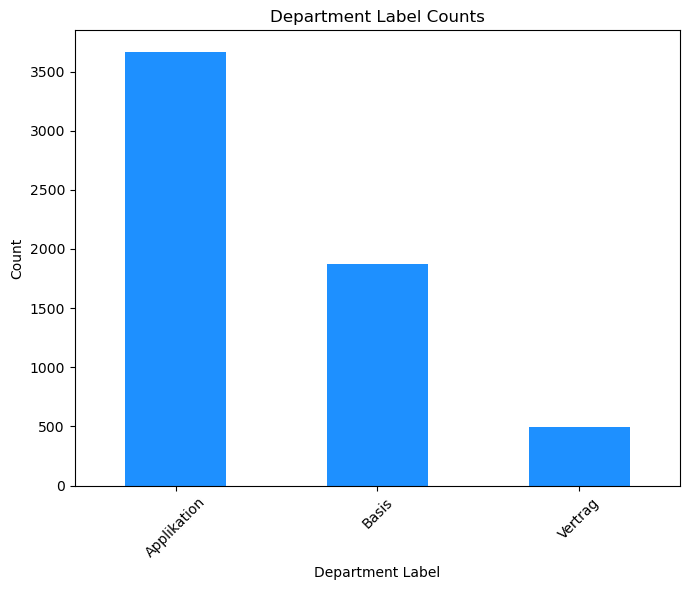

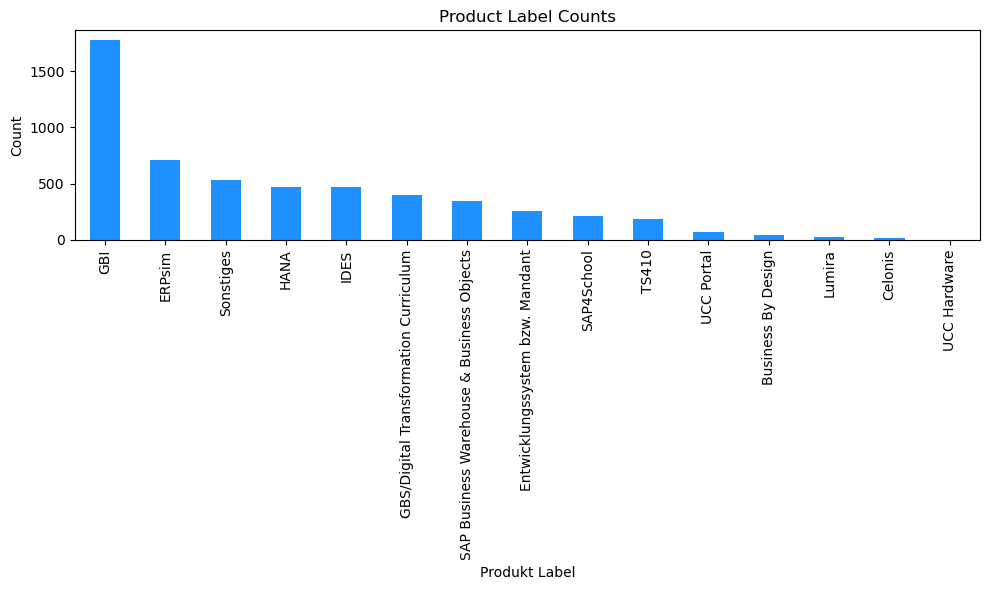

Ticket Label
2. Level    5799
1. Level    2627
Name: count, dtype: int64
Abteilung Label
Applikation    3665
Basis          1873
Vertrag         494
Name: count, dtype: int64
Produkt Label
GBI                                          1776
ERPsim                                        706
Sonstiges                                     534
HANA                                          471
IDES                                          466
GBS/Digital Transformation Curriculum         397
SAP Business Warehouse & Business Objects     347
Entwicklungssystem bzw. Mandant               256
SAP4School                                    208
TS410                                         184
UCC Portal                                     70
Business By Design                             41
Lumira                                         24
Celonis                                        12
UCC Hardware                                    1
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt

# First try of class reduction:
# Merging 'Celonis', 'Lumira', 'UCC Hardware', and 'UCC Portal' with 'Legacy'
    # ticketALL['Produkt Label'].replace(['Celonis', 'Lumira'], 'Legacy', inplace = True)
    # ticketALL['Produkt Label'].replace(['UCC Hardware', 'UCC Portal'], 'UCC Products', inplace = True)
    # Nearly no impact as categories have nothing in common and herefore could not be classified correctly

# Second try of class reduction: 
# Removing legacy produtcs entirely
    # , 'Celonis', 'Lumira', 'UCC Portal'
    #ticketALL = ticketALL[~ticketALL['Produkt Label'].isin(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'])]

# Third try of class reduction:
# Adding all legacy products to 'Sonstiges' as missclassification is high between those two:
    # ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'], 'Sonstiges', inplace = True)

# Fourth try of class reduction:
# Merging all global bike products into a new label 'global bike' as missclassification is highest between those two:
    #ticketALL['Produkt Label'].replace(['GBI', 'GBS/Digital Transformation Curriculum'], 'global bike', inplace = True)
    #ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'], 'Sonstiges', inplace = True)
    #ticketALL = ticketALL[~ticketALL['Produkt Label'].isin(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'])]

# Distribution of ticket labels
label_percentages = ticketALL['Ticket Label'].value_counts(normalize = True) * 100
department_percentages = ticketALL['Abteilung Label'][ticketALL['Abteilung Label'] != ''].value_counts(normalize = True) * 100
produkt_percentages = ticketALL['Produkt Label'][ticketALL['Produkt Label'] != ''].value_counts(normalize = True) * 100

# Plotting ticket label counts
label_counts = ticketALL['Ticket Label'].value_counts()
plt.figure(figsize = (6, 6))
label_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Ticket Label Counts')
plt.xlabel('Ticket Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('ticket_label.jpg', format = 'jpg', dpi = 300)
plt.show()

# Plotting department label counts
department_counts = ticketALL['Abteilung Label'].loc[ticketALL['Abteilung Label'] != ''].value_counts()
plt.figure(figsize = (7, 6))
department_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Department Label Counts')
plt.xlabel('Department Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('abteilung_label.jpg', format = 'jpg', dpi = 300)
plt.show()


# Plotting product label counts
produkt_counts = ticketALL['Produkt Label'].loc[ticketALL['Produkt Label'] != ''].value_counts()
plt.figure(figsize = (10, 6))
produkt_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Product Label Counts')
plt.xlabel('Produkt Label')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('produkt_label.jpg', format='jpg', dpi = 300)
plt.show()

print(label_counts)
print(department_counts)
print(produkt_counts)

In [6]:
# How much tickets are left when class reducing
ticketALL.count()

# Average length of natural language columns 
average_length_text = ticketALL['Text'].apply(len).mean()
average_length_descr = ticketALL['Beschreibung'].apply(len).mean()

print("Average length 'Text' Column: ", average_length_text)
print("Average length 'Description' Column: ", average_length_descr)

Average length 'Text' Column:  1145.062069784002
Average length 'Description' Column:  27.33895086636601


: 

In [7]:
from langdetect import detect

def language_detect(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Langage detection to the 'Text' column
ticketALL['Sprache'] = ticketALL['Text'].apply(language_detect)

# Language detection with fallback column (focus on 'Text' column as it is mostly longer)
def language_detect_with_fallback(row):
    
    language = row['Sprache']
    fallback_text = row['Beschreibung']
    
    if language == 'unknown':
        detected_language = language_detect(fallback_text)
        
        if detected_language in ['en', 'de']:
            return detected_language
        else:
            return 'de' 
    else:
        if language in ['en', 'de']:
            return language
        else:
            return 'de'

ticketALL['Sprache'] = ticketALL.apply(language_detect_with_fallback, axis = 1)

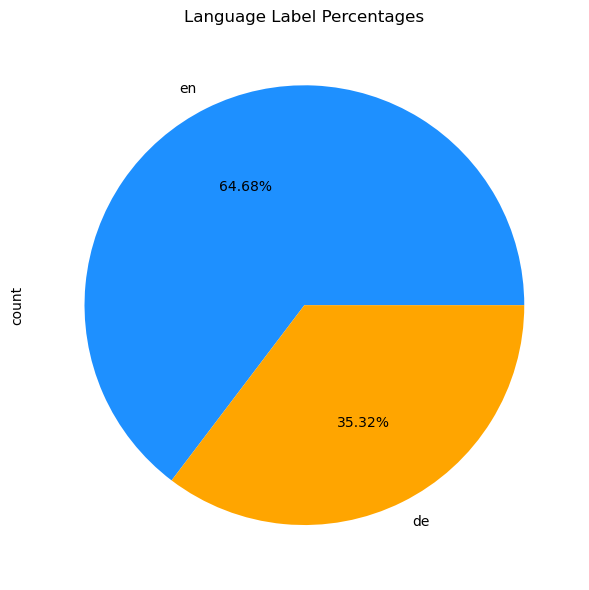

         Count  Percentage
Sprache                   
en        5450    64.68075
de        2976    35.31925


In [8]:
# Count the occurrences of each language in the specified column
language_counts = ticketALL['Sprache'].value_counts()

# Total count of languages
total_count = len(ticketALL['Sprache'])

# Percentage of each language
language_percentages = (language_counts / total_count) * 100

# Display the results
language_df = pd.DataFrame({'Count': language_counts, 'Percentage': language_percentages})


# Plotting language counts
plt.figure(figsize = (6, 6))
language_percentages.plot(kind = 'pie', colors = ['#1E90FF', 'orange'], autopct = '%.2f%%')
plt.title('Language Label Percentages')
plt.tight_layout()
plt.savefig('languages_pie.jpg', format = 'jpg', dpi = 300)
plt.show()
print(language_df)

In [9]:
# Testing the language detection
filtered_df = ticketALL[ticketALL['Sprache'].isin(['en'])]
filtered_df.head()

,ID,Nachrichtentyp,Datum,Uhrzeit,Absender,Ort,Text,Timestamp,Beschreibung,Kategorie ID,...,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Erste Nachricht,Letzte Nachricht,Sprache
0,2000014951,Beschreibung,2024.01.02,13:21:16,U2ES001KS1 Katrin Simon-Elorz,E-31006 Pamplona,"Dear Colleagues Next January 8, from 9:00 a.m....",2024-01-02 13:21:16,Exam next 8th january,ZSD_SR_S4HANA,...,U2ES001KS1,2024.01.22\t18:00:17,BORYS,U2ES001 Public University of Navarra - UPNA,U2ES001KS1 Frau Katrin Simon-Elorz,0000000044 UCC UCC Supportteam,H2851US4 Herr UCC Support,2024.01.02\t13:21:16,2024.01.22\t18:00:17,en
3,2000014954,Beschreibung,2024.01.03,13:32:38,U2GB050DP1 David Pettigrew,G-0QB Jordanstown,"Hello, i am very new to sap. I have install...",2024-01-03 13:32:38,Hostname unknown,ZSD_SR_GUI,...,U2GB050DP1,2024.01.28\t18:00:31,BORYS,U2GB050 Ulster University,U2GB050DP1 Herr David Pettigrew,0000000044 UCC UCC Supportteam,H2851US4 Herr UCC Support,2024.01.03\t13:32:38,2024.01.28\t18:00:31,en
4,2000014955,Beschreibung,2024.01.04,08:58:21,U2RO007FM1 Florin Mihai,R-010374 Bucuresti,"Dear colleagues, Is it possible to change the ...",2024-01-04 08:58:21,Change the settings for my user,ZSD_SR_AA,...,U2RO007FM1,2024.02.13\t18:00:34,MASTER-ADM,U2RO007 The Bucharest University of Economic S...,U2RO007FM1 Herr Florin Mihai,0000000047 APP Applikation,H2851NB3 Frau Niluefer Faizan,2024.01.04\t08:58:21,2024.02.13\t18:00:34,en
10,2000014961,Beschreibung,2024.01.08,09:17:17,H2851US4 UCC Support,D-85748 Garching,"From: Saad, Sameh <(><<)>s.saad@shu.ac.uk> Sen...",2024-01-08 09:17:17,Financial Accounting module,ZSD_SR_S4HANA,...,H2851US4,2024.02.17\t18:00:17,MASTER-ADM,U2GB005 Sheffield Hallam University,U2GB005SS1 Herr Sameh Saad,0000000047 APP Applikation,H2851NB3 Frau Niluefer Faizan,2024.01.08\t09:17:17,2024.02.17\t18:00:17,en
12,2000014963,Beschreibung,2024.01.08,10:25:22,U2GR001AG1 Aggeliki Gerondi,G-18531 Piraeus,"Dear Sirs Happy New Year, as I tried to creat...",2024-01-08 10:25:22,Problem creating a connection,ZSD_SR_GUI,...,U2GR001AG1,2024.01.28\t18:00:35,BORYS,U2GR001 University of Piraeus,U2GR001AG1 Frau Aggeliki Gerondi,0000000047 APP Applikation,H2851US4 Herr UCC Support,2024.01.08\t10:25:22,2024.01.28\t18:00:35,en


In [10]:
# Cleaning of for now useless Columns
columns_to_remove = ['Ort', 'Kategorietext', 'Unterkategorietext', 'Status', 'Angelegt Am' ,'Angelegt Von', 'Geändert Am', 'Geändert Von', 'Auftraggeber', 'Meldender', 'Support Team', 'Bearbeiter', 'Erste Nachricht', 'Letzte Nachricht',
                     'Nachrichtentyp', 'Datum', 'Uhrzeit', 'Absender', 'Priorität']

for column in columns_to_remove:
    del ticketALL[column]

In [11]:
# Actual NLP step by step
# 1. Converting 'Text' and 'Description' to lower case

ticketALL['Text'] = ticketALL['Text'].str.lower()
ticketALL['Beschreibung'] = ticketALL['Beschreibung'].str.lower()

# 2. Removing special charcters and links

def remove_special_characters(text): 
    return re.sub(r'[^A-Za-z0-9\säöüßÄÖÜ]', '', text)

def remove_links(text):
    return re.sub(r'http\S+|www.\S+', '', text)


# Applying it to the "natural language"-Columns
ticketALL['Text'] = ticketALL['Text'].apply(remove_special_characters)
ticketALL['Text'] = ticketALL['Text'].apply(remove_links)

ticketALL['Beschreibung'] = ticketALL['Beschreibung'].apply(remove_special_characters)
ticketALL['Beschreibung'] = ticketALL['Beschreibung'].apply(remove_links)

ticketALL.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache
0,2000014951,dear colleagues next january 8 from 900 am to ...,2024-01-02 13:21:16,exam next 8th january,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SE,1. Level,,,en
1,2000014952,guten tag wir probieren aktuell die introtos4...,2024-01-02 18:59:52,s4global bike case error fiori lauchpad,ZSD_SR_GUI,,1. Level,Applikation,GBI,de
2,2000014953,sehr geehrte damen und herren leider wird mir...,2024-01-03 11:13:31,mandantenrücksetzung s77 mandant 303,ZSD_SR_S4HANA,ZSD_SR_S4HANA_MR,2. Level,Basis,GBI,de
3,2000014954,hello i am very new to sap i have installed...,2024-01-03 13:32:38,hostname unknown,ZSD_SR_GUI,,1. Level,Applikation,GBI,en
4,2000014955,dear colleagues is it possible to change the d...,2024-01-04 08:58:21,change the settings for my user,ZSD_SR_AA,ZSD_SR_AA_SU,1. Level,,,en


In [12]:
# 3. Tokenization 
import spacy

# Load spaCy language models
# After installing spacy, use ~/miniconda3/envs/[ENV NAME]/bin/python -m spacy download de_core_news_sm
spacy_en = spacy.load("en_core_web_sm")
spacy_de = spacy.load("de_core_news_sm")

# Tokenize 'Beschreibung' based on the language label
def tokenize_text_beschreibung(row):
    language = row['Sprache']
    text = row['Beschreibung']
    if language == 'en':
        return_text = spacy_en(text)
    elif language == 'de':
        return_text = spacy_de(text)
    else:
        return_text = None  
    return return_text

# Tokenize 'Text' based on the language label
def tokenize_text_text(row):
    language = row['Sprache']
    text = row['Text']
    if language == 'en':
        return_text = spacy_en(text)
    elif language == 'de':
        return_text = spacy_de(text)
    else:
        return_text = None  
    return return_text


# Tokenizing based on language label
ticketALL['tokenized_beschreibung'] = ticketALL.apply(tokenize_text_beschreibung, axis = 1)
ticketALL['tokenized_text'] = ticketALL.apply(tokenize_text_text, axis = 1)

ticketALL.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache,tokenized_beschreibung,tokenized_text
0,2000014951,dear colleagues next january 8 from 900 am to ...,2024-01-02 13:21:16,exam next 8th january,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SE,1. Level,,,en,"(exam, next, 8th, january)","(dear, colleagues, next, january, 8, from, 900..."
1,2000014952,guten tag wir probieren aktuell die introtos4...,2024-01-02 18:59:52,s4global bike case error fiori lauchpad,ZSD_SR_GUI,,1. Level,Applikation,GBI,de,"(s4global, bike, case, error, fiori, lauchpad)","(guten, tag, , wir, probieren, aktuell, die, ..."
2,2000014953,sehr geehrte damen und herren leider wird mir...,2024-01-03 11:13:31,mandantenrücksetzung s77 mandant 303,ZSD_SR_S4HANA,ZSD_SR_S4HANA_MR,2. Level,Basis,GBI,de,"(mandantenrücksetzung, s77, mandant, 303)","(sehr, geehrte, damen, und, herren, , leider,..."
3,2000014954,hello i am very new to sap i have installed...,2024-01-03 13:32:38,hostname unknown,ZSD_SR_GUI,,1. Level,Applikation,GBI,en,"(hostname, unknown)","( , hello, i, am, very, new, to, sap, , i, h..."
4,2000014955,dear colleagues is it possible to change the d...,2024-01-04 08:58:21,change the settings for my user,ZSD_SR_AA,ZSD_SR_AA_SU,1. Level,,,en,"(change, the, settings, for, my, user)","(dear, colleagues, is, it, possible, to, chang..."


In [13]:
# 4. Removal of stop words

# Remove stop words based on language
def remove_stop_words_by_language(text, language):
    if language == 'en':
        language_model = spacy_en
    elif language == 'de':
        language_model = spacy_de
    else:
        language_model = None

    if language_model:
        edited_text = language_model(text)
        tokens_without_stopwords = [token.text for token in edited_text if not token.is_stop]
        return ' '.join(tokens_without_stopwords)
    else:
        return text  


# Applying the function to the DataFrame ('Text', 'Beschreibung')
ticketALL['filtered_text'] = ticketALL.apply(lambda row: remove_stop_words_by_language(row['tokenized_text'], row['Sprache']), axis = 1)
ticketALL['filtered_beschreibung'] = ticketALL.apply(lambda row: remove_stop_words_by_language(row['tokenized_beschreibung'], row['Sprache']), axis = 1)

# ticketALL.head()
#empty_string_rows = ticketALL[ticketALL['Text'] == '']
#empty_string_rows.head()
english_rows = ticketALL[ticketALL['Sprache'] == 'de']
english_rows.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache,tokenized_beschreibung,tokenized_text,filtered_text,filtered_beschreibung
1,2000014952,guten tag wir probieren aktuell die introtos4...,2024-01-02 18:59:52,s4global bike case error fiori lauchpad,ZSD_SR_GUI,,1. Level,Applikation,GBI,de,"(s4global, bike, case, error, fiori, lauchpad)","(guten, tag, , wir, probieren, aktuell, die, ...",guten probieren aktuell introtos4hanausinggl...,s4global bike case error fiori lauchpad
2,2000014953,sehr geehrte damen und herren leider wird mir...,2024-01-03 11:13:31,mandantenrücksetzung s77 mandant 303,ZSD_SR_S4HANA,ZSD_SR_S4HANA_MR,2. Level,Basis,GBI,de,"(mandantenrücksetzung, s77, mandant, 303)","(sehr, geehrte, damen, und, herren, , leider,...",geehrte damen herren selfservice mandantenzu...,mandantenrücksetzung s77 mandant 303
5,2000014956,sehr geehrte damen und herren vielen dank das...,2024-01-04 15:54:52,passwort für masteruser zurücksetzen,ZSD_SR_S4HANA,ZSD_SR_S4HANA_PRM,1. Level,,,de,"(passwort, für, masteruser, zurücksetzen)","(sehr, geehrte, damen, und, herren, , vielen,...",geehrte damen herren unseren mandanten schne...,passwort masteruser zurücksetzen
6,2000014957,liebes uccteam in der fallstudie copc ii mehr...,2024-01-04 22:10:49,preisfortschreibung funktioniert nicht,ZSD_SR_S4HANA,ZSD_SR_S4HANA_FP,2. Level,,,de,"(preisfortschreibung, funktioniert, nicht)","(liebes, uccteam, , in, der, fallstudie, copc...",liebes uccteam fallstudie copc ii mehrstufig...,preisfortschreibung funktioniert
7,2000014958,sehr geehrte damen und herren vielen dank für...,2024-01-05 12:03:18,passwortrücksetzung masteruser,ZSD_SR_S4HANA,ZSD_SR_S4HANA_PRM,1. Level,Applikation,GBI,de,"(passwortrücksetzung, masteruser)","(sehr, geehrte, damen, und, herren, , vielen,...",geehrte damen herren schnelle erledigung ges...,passwortrücksetzung masteruser


: 

In [ ]:
# 5. Stemming of the tokens
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer

# Initializing of stemmers
german_stemmer = SnowballStemmer("german")
# I could not get cistem stemmer running on M2 mac -> default to porter
english_stemmer = PorterStemmer()

# Stemming the #Text' column
def stem_text(row):
    if row['Sprache'] == 'en':
        return ' '.join([english_stemmer.stem(word) for word in row['filtered_text'].split()])
    elif row['Sprache'] == 'de':
        return ' '.join([german_stemmer.stem(word) for word in row['filtered_text'].split()])
    return row['Text']

# Stemming the 'Beschreibung' column
def stem_beschreibung(row):
    if row['Sprache'] == 'en':
        return ' '.join([english_stemmer.stem(word) for word in row['filtered_beschreibung'].split()])
    elif row['Sprache'] == 'de':
        return ' '.join([german_stemmer.stem(word) for word in row['filtered_beschreibung'].split()])
    return row['Text']

# Applying the stemming-function to the text columns ('Text', 'Beschreibung')
ticketALL['stemmed_text'] = ticketALL.apply(stem_text, axis = 1)
ticketALL['stemmed_beschreibung'] = ticketALL.apply(stem_beschreibung, axis = 1)

ticketALL.head()

In [ ]:
# 6a. Vectorization with Tfid encoding
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

# Place for class reduction after preprocessing
ticketALL['Produkt Label (Merged)'] = ticketALL['Produkt Label'].replace(['GBI', 'GBS/Digital Transformation Curriculum'], 'global bike', inplace = False) # Merge GBS & GBI
# ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'], 'Sonstiges', inplace = True)
# 'UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'

categorical_columns = ['Kategorie ID', 'Unterkategorie ID']

# Filter out rows with empty strings AND ONLY 2nd LEVEL SUPPORT
non_empty_rows = (ticketALL['Produkt Label (Merged)'] != '') & (ticketALL['Ticket Label'] == '2. Level')
filtered_data = ticketALL[non_empty_rows]

x_data = filtered_data[(['stemmed_text', 'stemmed_beschreibung'] + categorical_columns)]
table = filtered_data


# Tfidf vectorization for the training set
# TEXT column
tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(x_data['stemmed_text'])
# DESCRIPTION column
tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(x_data['stemmed_beschreibung'])
# Combine the Tfidf train-matrices horizontally
tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

In [ ]:
# 6b. Combining categorical and text data 
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

# One-hot encoding for categorical data
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoded_data_train = encoder.fit_transform(x_data[categorical_columns]).toarray()

# Convert the one-hot encoded arrays to sparse matrices
encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)

# Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
final_matrix_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))

#print(final_matrix_train)

In [ ]:
# 7a. Classification with confusion matrices
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections.abc import Sequence, Set


# Classification and evaluation in one method with different classifiers as parameter
def add_classifiaction(classifier, x_data, table, y_key='Produkt Label (Merged)'):
    clf_name = classifier.__class__.__name__

    y = table[y_key]

    # Initializing and prediction
    classifier.fit(x_data, y)
    y_pred = classifier.predict(x_data)
    table[f'{clf_name} Predictions'] = y_pred
    

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
add_classifiaction(rf_classifier, final_matrix_train, table)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
add_classifiaction(svm_classifier, final_matrix_train, table)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
add_classifiaction(nb_classifier, final_matrix_train, table)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
add_classifiaction(logreg_classifier, final_matrix_train, table)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
add_classifiaction(knn_classifier, final_matrix_train, table)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

table.to_excel('~/Desktop/classified_tickets.xlsx')

KeyError: 'Produkt Label (Merged)'